# Linear Regression

## Implementation of Normal Equation

In [2]:
#importing required depedencies
import numpy as np                  #for numerical calculation
import matplotlib.pyplot as plt     #for data visualization

In [11]:
#Generate sample data using numpy random function
m = 100   # Sample size
x = 2*np.random.rand(m,1)           #generate sample data for x                        
y = 4 + 3*x + np.random.rand(m, 1)  #generate sample data for y

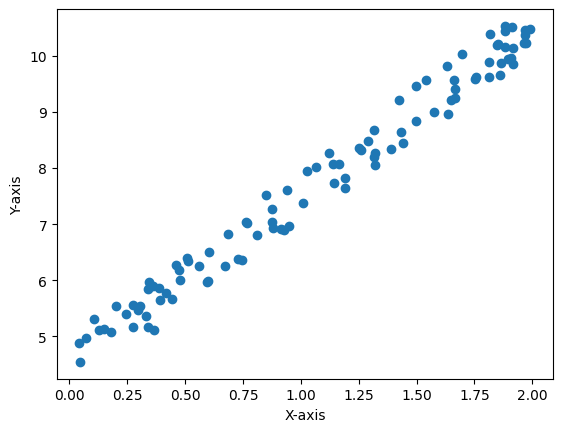

In [4]:
#plot point using scatter plot
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [5]:
#Adding bias to each term i.e. x0 = 1
xb = np.c_[np.ones((100, 1)), x]

In [6]:
best_theta = np.linalg.inv((xb.T).dot(xb)).dot(xb.T).dot(y)  #Using noraml equation calculate theta_value that minimize the error.
best_theta

array([[4.61708615],
       [2.90567604]])

## Predict value using theta

In [7]:
x_new = np.array([[0], [2]])            #generate numpy array of x_new            
x_new_b = np.c_[np.ones((2, 1)), x_new] #adding bias x0 = 0 at x_new array
x_new_b

array([[1., 0.],
       [1., 2.]])

In [8]:
y_predict = x_new_b.dot(best_theta)    #predict value using best_theta
y_predict

array([[ 4.61708615],
       [10.42843822]])

## Let's plot the  predictions

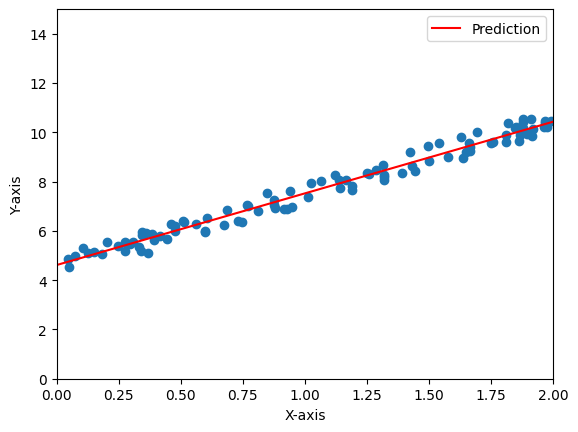

In [9]:
#plot prediction using matplotlib.pyplot library
plt.plot(x_new, y_predict, "r-")
plt.scatter(x, y)
plt.axis([0,2,0,15])         #define range for x-axis and y-axis
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(['Prediction'])
plt.show()

## Implementation using scikit learn library

In [12]:
from sklearn.linear_model import LinearRegression      #import Linear Regression using scikit learn
model = LinearRegression()                             #make model
model.fit(x, y)                                        #fit model on training data
model.intercept_, model.coef_                          

(array([4.53552655]), array([[2.93812409]]))